### Project Overview:

#### Project aim:

This projects aims to use Machine Learning modelling to identify key factors which can help to Kickstarter project creators to maximise the likelihood of success. This includes identifying trends in Kickstarter projects over the past decade as well as examining feature importances from our ML models. 

#### Dataset: 

The data on Kickstarter projects is downloaded from https://webrobots.io/kickstarter-datasets/ and filtered to only include projects from region: GB

In [385]:
# importing necessary modules

In [287]:
import pandas as pd
import numpy as np
from numpy.random import RandomState
import datetime
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from textblob import TextBlob
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk import FreqDist
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import cm
from sklearn.model_selection import RandomizedSearchCV
import string
from collections import Counter
# import xgboost as xgb
nltk.download('wordnet')
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.cluster import KMeans
from pprint import pprint
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from gensim.models.tfidfmodel import TfidfModel
from nltk.corpus.reader import *
from nltk.tokenize import RegexpTokenizer
from gensim.corpora.dictionary import Dictionary
from collections import Counter
from nltk.stem import WordNetLemmatizer
import texthero as hero

[nltk_data] Downloading package wordnet to /Users/ruijin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [240]:
pip install shap

     |████████████████████████████████| 433 kB 1.7 MB/s eta 0:00:01
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
# reading training data
df = pd.read_csv('train.csv')
df.head()

/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,19,21,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,3546,73,"Ireland, 1892. A mother must make the choice b...","{""id"":297,""name"":""Horror"",""slug"":""film & video...",5313,GB,the United Kingdom,1422483574,"{""id"":849401844,""name"":""David Ritchie"",""is_reg...",GBP,...,night-watch-short-film,https://www.kickstarter.com/discover/categorie...,True,False,successful,1425716470,1.515487,"{""web"":{""project"":""https://www.kickstarter.com...",5354.214723,domestic
1,2828,29,Its Red vs Blue! a colourfully designed 54 car...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1777,GB,the United Kingdom,1402242472,"{""id"":1455923443,""name"":""Third Moon Publishing...",GBP,...,lambda-red-and-blue-playing-cards,https://www.kickstarter.com/discover/categorie...,True,False,successful,1404431765,1.680139,"{""web"":{""project"":""https://www.kickstarter.com...",1740.623569,domestic
2,2729,25,Creating Masterclasses in Visual Effects using...,"{""id"":297,""name"":""Horror"",""slug"":""film & video...",18951,GB,the United Kingdom,1554146066,"{""id"":1789209886,""name"":""Hugo's Desk"",""slug"":""...",GBP,...,hugos-desk-presents-oaklake-a-visual-effects-m...,https://www.kickstarter.com/discover/categorie...,False,False,canceled,1558448980,1.291706,"{""web"":{""project"":""https://www.kickstarter.com...",19232.210038,domestic
3,567,28,Two enchanting short films inspired by Russian...,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",1380,GB,the United Kingdom,1410092688,"{""id"":827204801,""name"":""Owen Donovan"",""slug"":""...",GBP,...,waterbird-catkins-two-shorts-for-distribution,https://www.kickstarter.com/discover/categorie...,True,True,successful,1419371723,1.565923,"{""web"":{""project"":""https://www.kickstarter.com...",1385.841864,domestic
4,2814,207,"Hard hitting, historically accurate, unabridge...","{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",14489,GB,the United Kingdom,1537359332,"{""id"":221950647,""name"":""Simon Amadeus Pillario...",GBP,...,the-book-of-esther-word-for-word-bible-comic-book,https://www.kickstarter.com/discover/categorie...,True,False,successful,1541970001,1.322795,"{""web"":{""project"":""https://www.kickstarter.com...",14771.652547,domestic


In [3]:
df.columns

Index(['Unnamed: 0', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

### data cleaning

In [5]:
# Removing live and canceled states as we are only interested in projects that have succeeded or failed

df.drop(df.loc[df['state']=='canceled'].index,inplace=True)
df.drop(df.loc[df['state']=='live'].index,inplace=True)

In [6]:
# checking the shape of our dataset
df.shape

(16601, 39)

In [7]:
# we have an imbalance in the column which we will use to predict on, will balance this out later
Counter(df['state'])

Counter({'successful': 11200, 'failed': 5401})

In [8]:
# counting staff_pick column
Counter(df['staff_pick'])

Counter({False: 14191, True: 2410})

In [9]:
# Create 'blurb_length' column
df['blurb_length'] = df['blurb'].str.split().str.len()

In [10]:
# extracting project type

df['project_type']=df['source_url'].str.split(pat='/',n=6,expand=True)[5]
df['project_type'].value_counts()

film%20&%20video    2738
art                 1710
music               1562
publishing          1390
theater             1285
technology          1219
fashion             1176
games               1139
food                 933
photography          891
comics               749
design               724
journalism           432
crafts               379
dance                274
Name: project_type, dtype: int64

In [11]:
df.replace('film%20&%20video','film/video',inplace=True)
df['project_type'].unique()

array(['film/video', 'games', 'comics', 'photography', 'journalism',
       'music', 'design', 'art', 'food', 'technology', 'theater',
       'publishing', 'crafts', 'fashion', 'dance'], dtype=object)

In [12]:
# getting launch date and end date columns and converting to datetime format

df['launch_date'] = pd.to_datetime(df['launched_at'], unit='s')
df['end_date']=pd.to_datetime(df['deadline'], unit='s')

In [13]:
# creating additional campaign duration column 

df['campaign_duration']=df['end_date']-df['launch_date']
df['campaign_duration']=df['campaign_duration'].dt.days

In [14]:
df['launch_date']

0       2015-02-05 08:21:08
1       2014-06-08 23:56:05
3       2014-11-23 21:55:22
4       2018-10-12 14:16:17
5       2018-01-31 23:54:26
                ...        
17654   2014-08-14 21:41:34
17656   2019-12-16 19:58:31
17657   2019-09-02 06:24:58
17658   2020-08-15 15:07:55
17659   2015-11-16 13:17:13
Name: launch_date, Length: 16601, dtype: datetime64[ns]

In [15]:

#get which day of the week the campaign was launched
df['launch_day_of_week'] = df['launch_date'].dt.day_name()

In [16]:
# get which month that campaign was launched
df['launch_month'] = df['launch_date'].dt.month_name()

In [17]:
# get year of project 
df['launch_year'] = df['launch_date'].dt.year

In [18]:
df.head()

,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,...,usd_pledged,usd_type,blurb_length,project_type,launch_date,end_date,campaign_duration,launch_day_of_week,launch_month,launch_year
0,3546,73,"Ireland, 1892. A mother must make the choice b...","{""id"":297,""name"":""Horror"",""slug"":""film & video...",5313,GB,the United Kingdom,1422483574,"{""id"":849401844,""name"":""David Ritchie"",""is_reg...",GBP,...,5354.214723,domestic,21,film/video,2015-02-05 08:21:08,2015-03-07 08:21:08,30,Thursday,February,2015
1,2828,29,Its Red vs Blue! a colourfully designed 54 car...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1777,GB,the United Kingdom,1402242472,"{""id"":1455923443,""name"":""Third Moon Publishing...",GBP,...,1740.623569,domestic,15,games,2014-06-08 23:56:05,2014-07-03 23:56:05,25,Sunday,June,2014
3,567,28,Two enchanting short films inspired by Russian...,"{""id"":32,""name"":""Shorts"",""slug"":""film & video/...",1380,GB,the United Kingdom,1410092688,"{""id"":827204801,""name"":""Owen Donovan"",""slug"":""...",GBP,...,1385.841864,domestic,19,film/video,2014-11-23 21:55:22,2014-12-23 21:55:22,30,Sunday,November,2014
4,2814,207,"Hard hitting, historically accurate, unabridge...","{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",14489,GB,the United Kingdom,1537359332,"{""id"":221950647,""name"":""Simon Amadeus Pillario...",GBP,...,14771.652547,domestic,21,comics,2018-10-12 14:16:17,2018-11-11 21:00:00,30,Friday,October,2018
5,2448,28,I'm holding my first solo exhibition of my pho...,"{""id"":276,""name"":""Fine Art"",""slug"":""photograph...",775,GB,the United Kingdom,1516193232,"{""id"":1109932044,""name"":""Richard Hardwick"",""is...",GBP,...,779.274390,domestic,21,photography,2018-01-31 23:54:26,2018-02-21 12:00:00,20,Wednesday,January,2018


In [19]:
df['blurb_length'] = df['blurb'].str.split().str.len()


In [20]:
# filtering our dataset for EDA
df = df.filter(['backers_count','blurb','blurb_length','state','project_type','goal','pledged','launch_date','end_date','staff_pick','campaign_duration','launch_month','launch_day_of_week','launch_year'],axis=1)
df.tail()

,backers_count,blurb,blurb_length,state,project_type,goal,pledged,launch_date,end_date,staff_pick,campaign_duration,launch_month,launch_day_of_week,launch_year
17654,4,Introducing extrovert TV Chef Felicity Staywel...,20,failed,theater,400.0,50.0,2014-08-14 21:41:34,2014-09-13 21:41:34,False,30,August,Thursday,2014
17656,6,THE VITCHES is an original fantasy/dramedy pil...,20,failed,film/video,1500.0,33.0,2019-12-16 19:58:31,2020-02-14 19:58:31,False,60,December,Monday,2019
17657,222,"Stories of female friendship by women writers,...",12,successful,publishing,3500.0,4130.0,2019-09-02 06:24:58,2019-10-25 18:00:00,True,53,September,Monday,2019
17658,26,An educational card game for kids,6,successful,games,2000.0,2066.0,2020-08-15 15:07:55,2020-09-14 15:07:55,False,30,August,Saturday,2020
17659,16,Award Winning follows the self documentation/m...,22,failed,film/video,1725.0,547.0,2015-11-16 13:17:13,2015-12-16 13:17:13,False,30,November,Monday,2015


In [21]:
# check for null values

In [22]:
df.isnull().sum()

backers_count         0
blurb                 0
blurb_length          0
state                 0
project_type          0
goal                  0
pledged               0
launch_date           0
end_date              0
staff_pick            0
campaign_duration     0
launch_month          0
launch_day_of_week    0
launch_year           0
dtype: int64

In [23]:
# check for duplicated values

In [24]:
df.duplicated().sum()

1695

In [25]:
# dropping null values
df.drop_duplicates(inplace=True)

In [26]:
df.shape

(14906, 14)

In [27]:
df.duplicated().sum()

0

### EDA

In [29]:
df.describe()

,backers_count,blurb_length,goal,pledged,campaign_duration,launch_year
count,14906.000000,14906.000000,1.490600e+04,1.490600e+04,14906.000000,14906.000000
mean,125.117604,18.250503,2.119122e+04,6.945777e+03,31.580437,2016.918959
std,642.447414,5.336365,8.381761e+05,3.762877e+04,11.574040,2.164706
min,0.000000,1.000000,1.000000e+00,0.000000e+00,1.000000,2012.000000
25%,6.000000,15.000000,6.000000e+02,1.500000e+02,28.000000,2015.000000
50%,30.000000,19.000000,2.000000e+03,1.059000e+03,30.000000,2017.000000
75%,87.000000,22.000000,6.500000e+03,4.019750e+03,32.000000,2019.000000
max,58730.000000,31.000000,1.000000e+08,1.847107e+06,89.000000,2020.000000


In [30]:
# Lets look at the words used to describe the projectsz

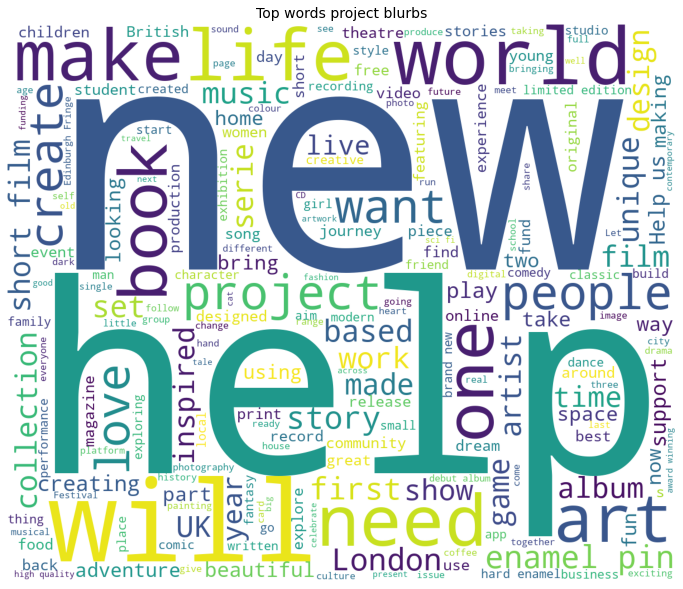

Time taken to complete this operation is 2.311556100845337 seconds


In [31]:
start = time.time()
plt.figure(figsize=(12,12))
token_title=' '.join(df['blurb'].values) 
wordcloud = WordCloud(max_font_size=None,background_color='white',
                     width=1200,height=1000).generate(token_title)
plt.imshow(wordcloud)
plt.title('Top words project blurbs',size=14)
plt.axis('off')
plt.show()
print("Time taken to complete this operation is",time.time()-start,'seconds')

Text(0.5, 0, '')

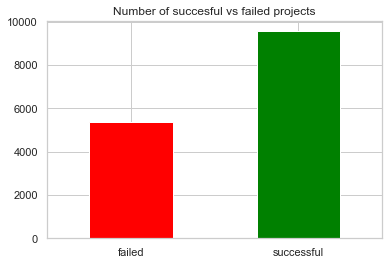

In [32]:
# plotting the overall number of successful vs failed projectsb
sns.set_theme(style="whitegrid")
ax = df['state'].value_counts(ascending=True).plot(kind='bar', color=['red', 'green'], rot=0)
ax.set_title('Number of succesful vs failed projects')
ax.set_xlabel('')

In [33]:
success_rate=round(len(df.loc[df['state'] == 'successful'])/len(df)*100,2)

print(f"The percentage of total successful projects is {success_rate}%")

The percentage of total successful projects is 64.11%


In [386]:
print(f"The dataset ranges from {min(df.launch_date).strftime('%d %B %Y')} and {max(df.launch_date).strftime('%d %B %Y')}.")


The dataset ranges from 30 October 2012 and 02 December 2020.


In [35]:
total_raised = df['pledged'].sum()
print(f'total amount raised is {total_raised}')

total amount raised is 103533750.99


In [36]:
# Over £100 millions raised by British projects between October 2012 and December 2020

In [37]:
raised_by_succesful = df.loc[df['state'] == 'successful'].pledged.sum()
print(f'total raised by succesful projects is {raised_by_succesful}')


total raised by succesful projects is 99085531.15


almost all the money raised is by successful projects

In [39]:
mean_pledged_overall = df['pledged'].mean()
mean_pledged_succesful = df.loc[df['state'] == 'successful'].pledged.mean()
mean_pledged_failed = df.loc[df['state'] == 'failed'].pledged.mean()

In [40]:
print(f'Mean amount pledged per project over all is {mean_pledged_overall}')
print(f'Mean amount pledged per succesful project is {mean_pledged_succesful}')
print(f'Mean amount pledged per failed project is {mean_pledged_failed}')

Mean amount pledged per project over all is 6945.776934791343
Mean amount pledged per succesful project is 10368.933774591858
Mean amount pledged per failed project is 831.4429607476637


Successful projects raise significantly more money from backers compared to failed projects

In [42]:
mean_backers = df['backers_count'].mean()
mean_backers_successful =  df.loc[df['state'] == 'successful'].backers_count.mean()
mean_backers_failed =  df.loc[df['state'] == 'failed'].backers_count.mean()

In [43]:
print(f'Mean number of backers per project over all is {mean_backers}')
print(f'Mean number of backers per succesful project is {mean_backers_successful}')
print(f'Mean number of backers per failed project is {mean_backers_failed}')

Mean number of backers per project over all is 125.1176036495371
Mean number of backers per succesful project is 188.11961071578065
Mean number of backers per failed project is 12.585420560747664


No surprises here, successful projects, successful projects have 90% more backers compared to failed projects

In [45]:
total_goal = df['goal'].sum()
print(f'British kickstarter projects hoped to raise a total of {total_goal}')

British kickstarter projects hoped to raise a total of 315876262.0


In [46]:
mean_goal = df['goal'].mean()
print(f'The mean fundraising goal is {mean_goal}')

The mean fundraising goal is 21191.215752046155


In [47]:
# campaign duration

In [48]:
mean_duration = round(df['campaign_duration'].mean(),2)
print(f'The average campaign lasts {mean_duration} days ')

The average campaign lasts 31.58 days 


<AxesSubplot:xlabel='state'>

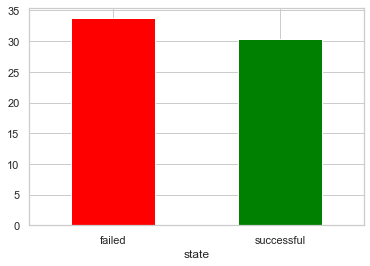

In [49]:
df.groupby(by='state').campaign_duration.mean().plot(kind='bar', color=['red', 'green'], rot=0)

Failed campaigns tend to be longer than successful campaigns, would be interesting to look into this further later when we run our machine learning models

<AxesSubplot:xlabel='project_type'>

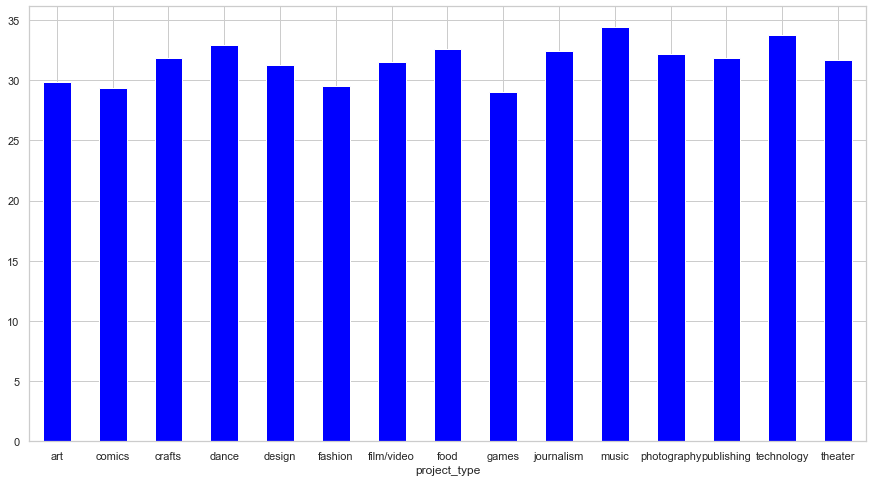

In [51]:
df.groupby(by='project_type').campaign_duration.mean().plot(kind='bar',color='blue', rot=0, figsize=(15,8))

Games projects have the shorted mean campaign duration, while music projects have the longest campaign duration

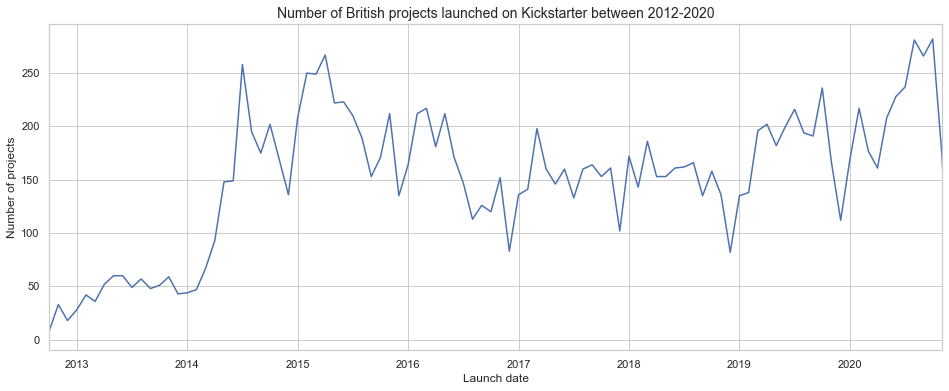

In [53]:
plt.figure(figsize=(16,6))
df.set_index('launch_date').project_type.resample('MS').count().plot()
plt.xlim('2012-10-30','2020-11-30')
plt.xlabel('Launch date')
plt.ylabel('Number of projects')
plt.title('Number of British projects launched on Kickstarter between 2012-2020', fontsize=14)
plt.show()

Number of project campaigns peaked in 2020, after a relatively stagnant few years 2016-2019

In [55]:
total_raised_per_year = df.groupby(by='launch_year').pledged.sum()
total_raised_per_year

launch_year
2012      350147.49
2013     4133566.96
2014     9176341.29
2015    10833234.21
2016     9188282.37
2017    10287628.01
2018    10248272.98
2019    16720224.72
2020    32596052.96
Name: pledged, dtype: float64

Text(0.5, 1.0, 'Total raised per year between 2012-2020')

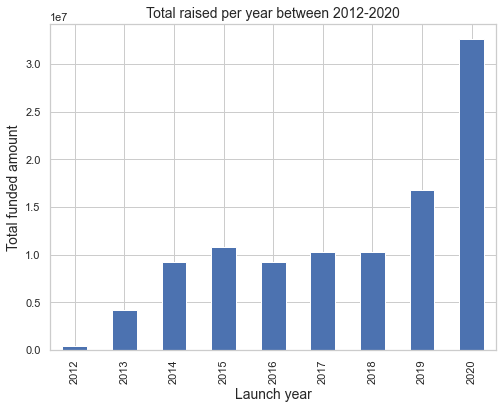

In [56]:
total_raised_per_year.plot(kind='bar', figsize=(8,6))
plt.xlabel('Launch year',fontsize=14)
plt.ylabel('Total funded amount',fontsize=14)
plt.title('Total raised per year between 2012-2020', fontsize=14)

We can see that the total amount raised in 2020 far exceeds all other years in the our dataset. It is almost double of the total 2019 raised. 

Text(0.5, 0, '')

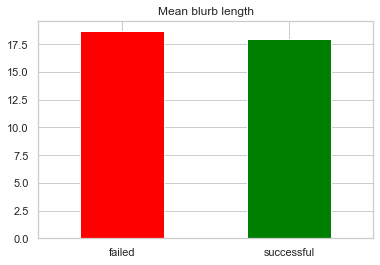

In [370]:
# plotting difference in mean blurb length between failed and successful projects
ax=df.groupby('state').blurb_length.mean().plot(kind='bar',color=['red', 'green'], rot=0)
ax.set_title('Mean blurb length')
ax.set_xlabel('')

Failed projects have slightly longer blurbs compared to successful projects, but by a very small margin

Text(0.5, 0, '')

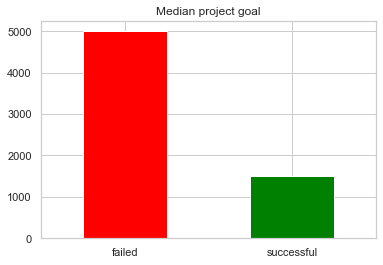

In [372]:
# Plotting difference in median project goal between failed and successful projects
ax = df.groupby('state').goal.median().plot(kind='bar',color=['red', 'green'], rot=0)
ax.set_title('Median project goal')
ax.set_xlabel('')

Huge difference in goal (median) between failed and successful projects. Failed projects have median goal of 5000£, while successful projects have more modest goals 1500£. 

In [57]:
# counting the number of different types of projects per year
pd.set_option('display.max_rows', None)
df.groupby(by='launch_year').project_type.value_counts()

launch_year  project_type
2012         music            18
             art              11
             publishing        9
             design            7
             film/video        7
             technology        4
             journalism        1
             photography       1
             theater           1
2013         music           151
             publishing      124
             art              95
             film/video       84
             technology       47
             games            28
             design           26
             dance            14
             journalism        9
             comics            2
             fashion           2
             crafts            1
             food              1
             photography       1
2014         film/video      287
             music           206
             art             177
             publishing      157
             theater         145
             photography     130
             tech

Very interesting to observe the growth in game related projects in 2020, which increased from 70 to 423, which is an increase of 500%. 
While theatre projects dropped from 113 to 25
Both could be pandemic related. As people are staying in-doors to play more games and theatre projects were 
postponsed due to social distancing measures

In [58]:
log_pledged = np.log(df['pledged'])

/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


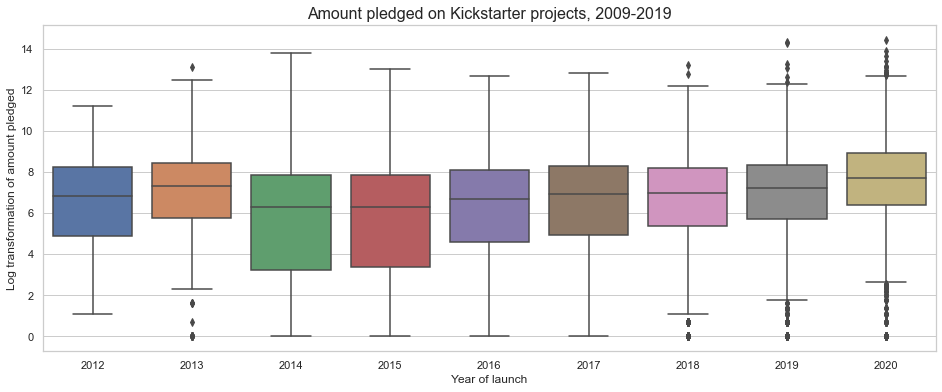

In [59]:
# Plotting the distribution of pledged amounts each year
plt.figure(figsize=(16,6))
sns.boxplot(df['launch_year'], log_pledged)
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Log transformation of amount pledged', fontsize=12) 
plt.title('Amount pledged on Kickstarter projects, 2009-2019', fontsize=16)
plt.show()

In [ ]:
# Let's look at the top 10 projects which raised the most money

In [179]:
top_10_projects = df.sort_values(by='pledged',ascending=False).head(10)[['blurb','pledged','project_type','launch_year']]
top_10_projects

,blurb,pledged,project_type,launch_year
10800,The ZX Spectrum Next: The Evolution of the ZX ...,1847106.96,technology,2020
4275,Explore a wacky galaxy full of hot alien babes...,1668626.00,games,2019
15613,The illuminated keyboard and app that lets you...,1629014.00,technology,2019
4164,🎵 Inspire songs and live your legend in this c...,1079994.33,games,2020
7181,"Wireless earbuds filled with sound, yet so sma...",972594.99,technology,2014
9815,A solo/cooperative survival horror board game ...,865698.49,games,2020
16356,Lix 3D pen enables you to doodle in the air. T...,731690.21,technology,2014
10180,"Experience immersive, intelligent audio to hel...",677954.77,design,2020
11700,Lunar Mission One: the most inspirational miss...,672447.28,technology,2014
1869,Created by former Dyson experts. Patented tech...,562339.00,technology,2019


Of the top 10 projects which received the most pledged amount, technology and games projects occopy 9/10 spots.

Text(0.5, 0, '')

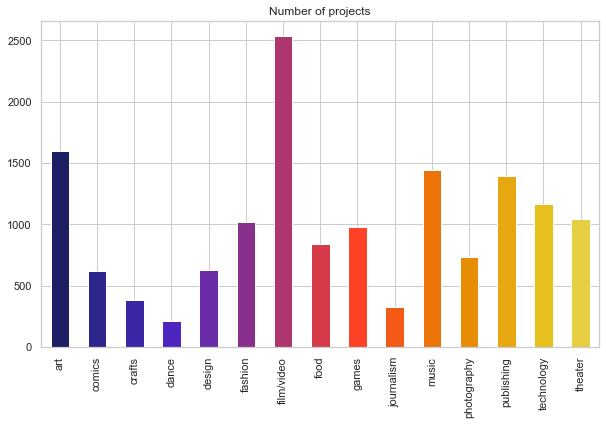

In [60]:
color = cm.CMRmap(np.linspace(0.1,0.8,df.project_type.nunique()))
ax = df.groupby('project_type').project_type.count().plot(kind='bar',color=color, figsize=(10,6))
ax.set_title('Number of projects')
ax.set_xlabel('')

Film/video is the category with the largest number of projects. Kickstarter seems to be very popular platform for this type of projects. 

Text(0.5, 0, '')

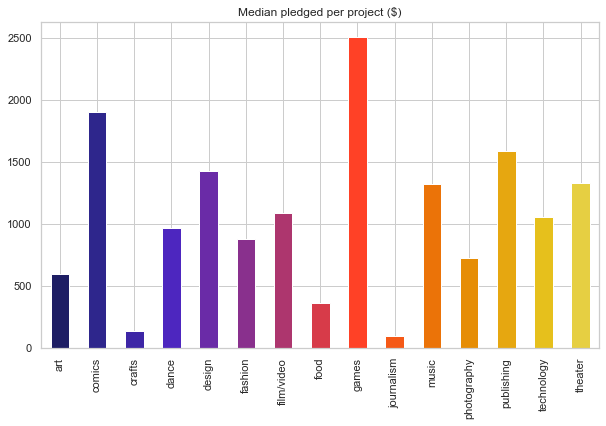

In [62]:
# Let's look at the median pledged amount for each type of project

ax = df.groupby('project_type').pledged.median().plot(kind='bar',color=color,figsize=(10,6))
ax.set_title('Median pledged per project ($)')
ax.set_xlabel('')

Projects in the games category received the highest median pledge, while projects in journalism received the lowest median pledged. It seems that journalism projects are not very suited for fundraising via Kickstarter

Text(0.5, 0, '')

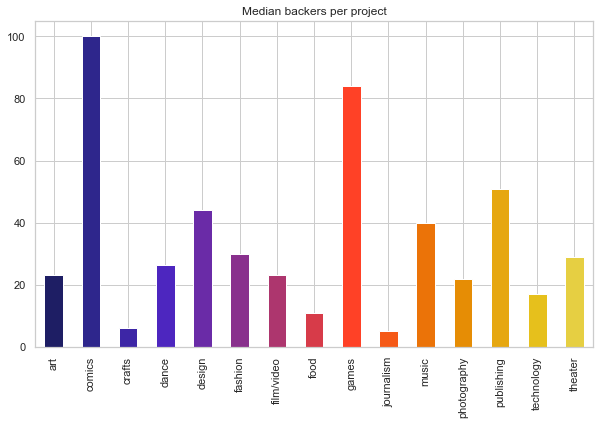

In [63]:
ax = df.groupby('project_type').backers_count.median().plot(kind='bar', color=color,figsize=(10,6))
ax.set_title('Median backers per project')
ax.set_xlabel('')

Comic projects has the highest median backer count, followed by games,  while journalism has the lowest

Text(0.5, 0, '')

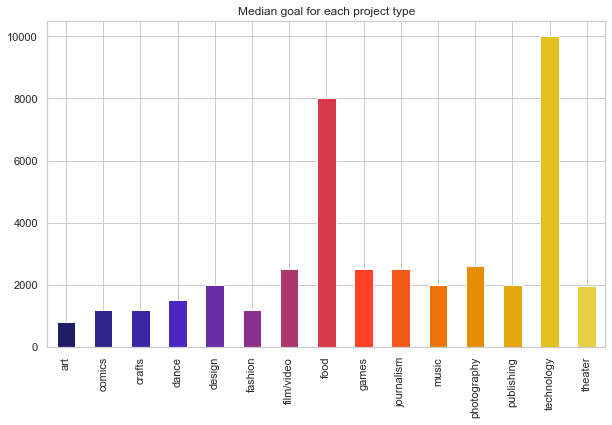

In [64]:
ax = df.groupby('project_type').goal.median().plot(kind='bar', color=color,figsize=(10,6))
ax.set_title('Median goal for each project type')
ax.set_xlabel('')

Technology and food projects have the highest median fundraising goal

Text(0.5, 0, '')

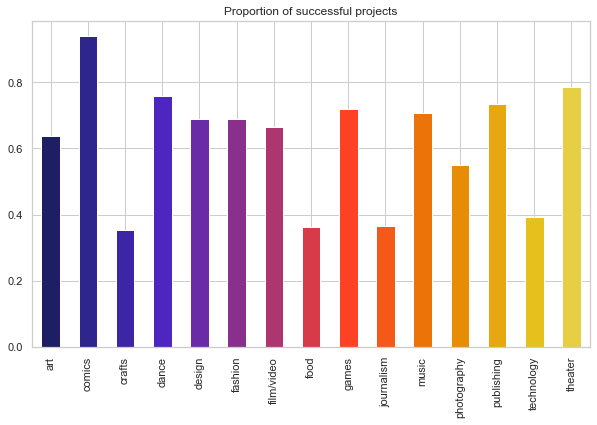

In [65]:
cat_df = pd.get_dummies(df.set_index('project_type').state).groupby('project_type').sum()
ax = cat_df.div(cat_df.sum(axis=1), axis=0).successful.plot(kind='bar', color=color, figsize=(10,6)) 
ax.set_title('Proportion of successful projects')
ax.set_xlabel('')

Comic projects has the highest proportion of successful projects. 

Text(0.5, 0, '')

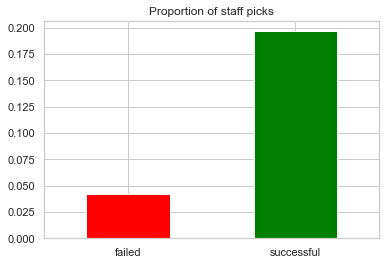

In [66]:
# How does being 'staff pick' affect the likelihood of project fundraising success
staff_pick = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
ax = (staff_pick.div(staff_pick.sum(axis=0), axis=1)).iloc[1].plot(kind='bar', color=['red', 'green'], rot=0) 
ax.set_title('Proportion of staff picks')
ax.set_xlabel('')

Staff pick has a big affect on whether a project succeeds or not

<Figure size 1440x360 with 0 Axes>

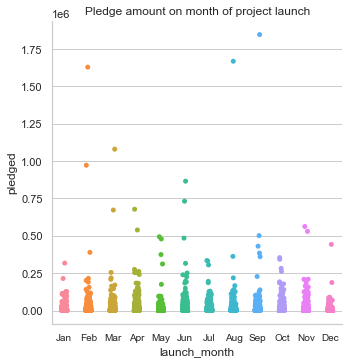

In [181]:
plt.figure(figsize=(20,5));
sns.catplot(x='launch_month',y='pledged', data=df);
plt.title('Pledge amount on month of project launch')
loc,labels=plt.xticks()
loc,labels=loc,["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc,labels,fontsize=10)
plt.show()

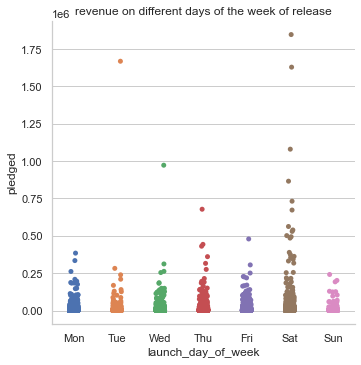

In [182]:
sns.catplot(x='launch_day_of_week',y='pledged',data=df)
plt.title('revenue on different days of the week of release')
loc,labels=plt.xticks()
lco,labels=loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc,labels)
plt.show()

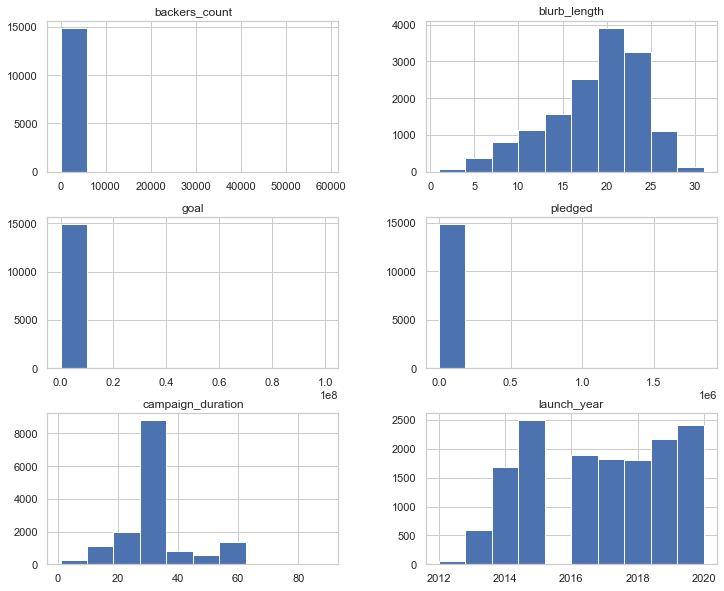

In [67]:
df[df.describe().columns].hist(figsize=(12,10));

#### Key EDA findings:

1. 2020 was the best year for British kickstarter projects in terms of the number of projects and total amount of money raised. 
2. Games projects boomed (500% increase!) in 2020, perhaps due the covid pandemic. 
3. Tech and games projects raise the most amount of money via Kickstarter
4. Film/video projects are very popular (in terms of number of projects) on Kickstarter, but are not particuarly successful in terms of overall money raised
5. Games projects receive the highest median pledge out of all project types, while Journalism projects receive the lowest median pledged amount. Kickstarter does not seem to be a good platform for Journalism projects. 
6. Projects with lower goals are more successful compared to projects with higher fundraising goals
7. Projects chosen as Staff Pick are more likely to success


### Applying Machine Learning models

#### Preprocessing for machine learning 

First look at outliers

<AxesSubplot:xlabel='goal'>

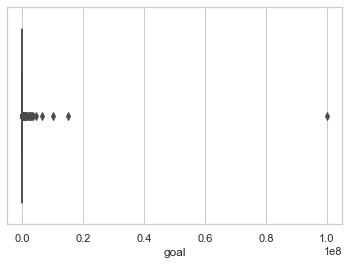

In [70]:
sns.boxplot(x=df['goal'])

In [71]:
# it is worth removing the most extreme outliers from our dataset, we will use the standard deviation * 3 method

In [72]:
goal_mean,goal_std = np.mean(df['goal']),np.std(df['goal'])
cut_off = goal_std *3
upper = goal_mean + cut_off

In [73]:
outliers = [x for x in df['goal'] if x > upper]

In [74]:
len(outliers)

8

In [75]:
# check the outlier values
outliers

[15000000.0,
 6500000.0,
 2700000.0,
 10000000.0,
 4500000.0,
 3000000.0,
 100000000.0,
 3583400.0]

In [76]:
# removing the outliers identified above
goal_outliers_removed = [x for x in df['goal'] if x < upper]

In [77]:
len(goal_outliers_removed)

14898

In [78]:
df=df[df.goal.isin(goal_outliers_removed)]

In [79]:
df.shape

(14898, 14)

/Users/ruijin/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='goal'>

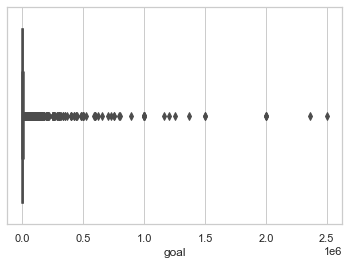

In [80]:
sns.boxplot(df['goal'])

Let's keep those other outliers as to not over curate our data

Further filtering the dataset for our machine learning classification analysis
For this, we will only keep the static variables which can be determined by the creator before the start of the project
We drop obvious dynamic variables such as backers count and the amount pledged

In [83]:
clf_df = df.drop(columns=['blurb','backers_count','pledged','launch_date','end_date','launch_year'])
clf_df.head()

,blurb_length,state,project_type,goal,staff_pick,campaign_duration,launch_month,launch_day_of_week
0,21,successful,film/video,3000.0,False,30,February,Thursday
1,15,successful,games,1000.0,False,25,June,Sunday
3,19,successful,film/video,800.0,True,30,November,Sunday
4,21,successful,comics,10000.0,False,30,October,Friday
5,21,successful,photography,500.0,False,20,January,Wednesday


In [84]:
# first look at correlation
cormat = clf_df.corr()
round(cormat,2)

,blurb_length,goal,staff_pick,campaign_duration
blurb_length,1.00,0.02,-0.00,0.03
goal,0.02,1.00,0.01,0.08
staff_pick,-0.00,0.01,1.00,-0.02
campaign_duration,0.03,0.08,-0.02,1.00


<AxesSubplot:>

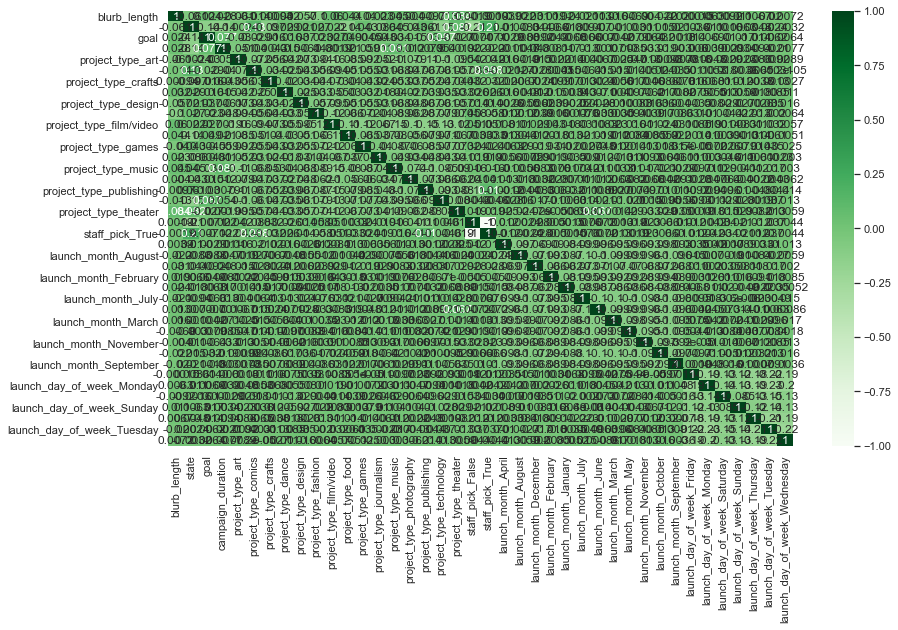

In [328]:
#Correlation graph
plt.figure(figsize = (14,8))
sns.heatmap(clf_df.corr(), annot = True, cmap="Greens")

In [86]:
clf_df.head()

,blurb_length,state,project_type,goal,staff_pick,campaign_duration,launch_month,launch_day_of_week
0,21,successful,film/video,3000.0,False,30,February,Thursday
1,15,successful,games,1000.0,False,25,June,Sunday
3,19,successful,film/video,800.0,True,30,November,Sunday
4,21,successful,comics,10000.0,False,30,October,Friday
5,21,successful,photography,500.0,False,20,January,Wednesday


One hot encoding categorical variables, it is reasonsable to do this here, as it would not create TOO many features
that it becomes unworkable. i.e parallelism, curse of dimensionality

In [88]:
cols_for_dummies = ['project_type', 'staff_pick', 'launch_month', 'launch_day_of_week'] 
clf_df = pd.get_dummies(clf_df, columns = cols_for_dummies)

In [89]:
clf_df.columns

Index(['blurb_length', 'state', 'goal', 'campaign_duration',
       'project_type_art', 'project_type_comics', 'project_type_crafts',
       'project_type_dance', 'project_type_design', 'project_type_fashion',
       'project_type_film/video', 'project_type_food', 'project_type_games',
       'project_type_journalism', 'project_type_music',
       'project_type_photography', 'project_type_publishing',
       'project_type_technology', 'project_type_theater', 'staff_pick_False',
       'staff_pick_True', 'launch_month_April', 'launch_month_August',
       'launch_month_December', 'launch_month_February',
       'launch_month_January', 'launch_month_July', 'launch_month_June',
       'launch_month_March', 'launch_month_May', 'launch_month_November',
       'launch_month_October', 'launch_month_September',
       'launch_day_of_week_Friday', 'launch_day_of_week_Monday',
       'launch_day_of_week_Saturday', 'launch_day_of_week_Sunday',
       'launch_day_of_week_Thursday', 'launch_day_of_

In [90]:
# converting state column to 1/0 labels
le=preprocessing.LabelEncoder()
clf_df['state']=le.fit_transform(clf_df['state'])

In [91]:
clf_df.head()

,blurb_length,state,goal,campaign_duration,project_type_art,project_type_comics,project_type_crafts,project_type_dance,project_type_design,project_type_fashion,...,launch_month_November,launch_month_October,launch_month_September,launch_day_of_week_Friday,launch_day_of_week_Monday,launch_day_of_week_Saturday,launch_day_of_week_Sunday,launch_day_of_week_Thursday,launch_day_of_week_Tuesday,launch_day_of_week_Wednesday
0,21,1,3000.0,30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,15,1,1000.0,25,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,19,1,800.0,30,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,21,1,10000.0,30,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,21,1,500.0,20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [92]:
# creating features and labels
clf_X = clf_df.drop('state', axis=1) # features for classification models
clf_y = clf_df.state # label of classification prediction

In [127]:
# check for class balance
Counter(clf_df['state'])

Counter({1: 9556, 0: 5342})

In [94]:
# transform the dataset with SMOTE oversampling, as imbalanced classes could negatively affect the performance of our model

oversample = SMOTE()
clf_X, clf_y = oversample.fit_resample(clf_X, clf_y)



In [95]:
# scaling our data using standard scaler
scaler = StandardScaler()
clf_X_scaled = pd.DataFrame(scaler.fit_transform(clf_X), columns=list(clf_X.columns))
clf_X_scaled.head()

,blurb_length,goal,campaign_duration,project_type_art,project_type_comics,project_type_crafts,project_type_dance,project_type_design,project_type_fashion,project_type_film/video,...,launch_month_November,launch_month_October,launch_month_September,launch_day_of_week_Friday,launch_day_of_week_Monday,launch_day_of_week_Saturday,launch_day_of_week_Sunday,launch_day_of_week_Thursday,launch_day_of_week_Tuesday,launch_day_of_week_Wednesday
0,0.518243,-0.142934,-0.167934,-0.311959,-0.182801,-0.146208,-0.106414,-0.185534,-0.240378,2.460162,...,-0.270156,-0.285991,-0.271159,-0.387667,-0.410924,-0.266796,-0.254897,2.598720,-0.452734,-0.397079
1,-0.629237,-0.167810,-0.598286,-0.311959,-0.182801,-0.146208,-0.106414,-0.185534,-0.240378,-0.406477,...,-0.270156,-0.285991,-0.271159,-0.387667,-0.410924,-0.266796,3.923147,-0.384805,-0.452734,-0.397079
2,0.135750,-0.170298,-0.167934,-0.311959,-0.182801,-0.146208,-0.106414,-0.185534,-0.240378,2.460162,...,3.701559,-0.285991,-0.271159,-0.387667,-0.410924,-0.266796,3.923147,-0.384805,-0.452734,-0.397079
3,0.518243,-0.055867,-0.167934,-0.311959,5.470427,-0.146208,-0.106414,-0.185534,-0.240378,-0.406477,...,-0.270156,3.496612,-0.271159,2.579532,-0.410924,-0.266796,-0.254897,-0.384805,-0.452734,-0.397079
4,0.518243,-0.174029,-1.028638,-0.311959,-0.182801,-0.146208,-0.106414,-0.185534,-0.240378,-0.406477,...,-0.270156,-0.285991,-0.271159,-0.387667,-0.410924,-0.266796,-0.254897,-0.384805,-0.452734,2.518392


In [110]:
# splitting into training and testing set
clf_X_scaled_train, clf_X_scaled_test, y_train, y_test = train_test_split(clf_X_scaled,clf_y, test_size=0.3, random_state=42)


#### PCA to look at level of variation explained 

In [200]:
pca = PCA()
pca.fit_transform(clf_X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

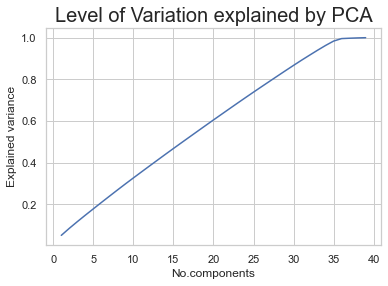

In [331]:
plt.plot(list(range(1, len(explained_var)+1)), explained_var)
plt.title('Level of Variation explained by PCA', size=20)
plt.xlabel('No.components')
plt.ylabel('Explained variance');

35 out of the 40 features explain 100% of variance in our data, it is not necessary to set pc=35 here, as keeping the 40 original features would not drastically slow down or worsen performance

In [349]:
# Let's look use PCA to look at feature importance

In [340]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

In [344]:
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = clf_X_scaled.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
variable,,,,,,,,,,,,,,,,,,,,,
blurb_length,-0.014819,0.429417,0.023917,-0.153950,0.033467,-0.035115,-0.002429,0.060219,0.151573,0.076652,...,0.086699,-0.179973,-0.016192,0.072322,0.000338,-0.068175,-0.211641,-0.035227,0.453052,-0.546868
goal,-0.018984,0.127539,0.397926,0.099551,0.049260,0.026086,0.055078,0.144034,-0.066380,0.115148,...,-0.039446,0.286364,-0.009698,-0.005644,0.058547,0.168161,-0.108422,0.419741,0.481741,0.318777
campaign_duration,-0.040849,0.283511,0.347812,-0.036323,-0.107183,0.042850,0.236791,-0.098702,-0.058593,-0.066524,...,0.028723,0.048666,-0.013769,-0.023602,0.019901,0.185256,0.054095,0.353374,-0.519429,-0.440375
project_type_art,-0.039775,-0.211482,-0.249364,-0.040364,-0.055505,0.105087,-0.136679,0.022138,-0.215295,-0.061363,...,0.042277,-0.037278,-0.046397,-0.033443,0.016589,0.006432,-0.191691,0.159578,0.012352,-0.148259
project_type_comics,0.132905,-0.113926,-0.098676,0.101993,-0.024373,0.007235,-0.003423,-0.061708,0.206920,0.209437,...,0.019880,-0.037508,0.252910,-0.091672,-0.362786,-0.030712,0.437385,0.298797,0.066447,-0.049747


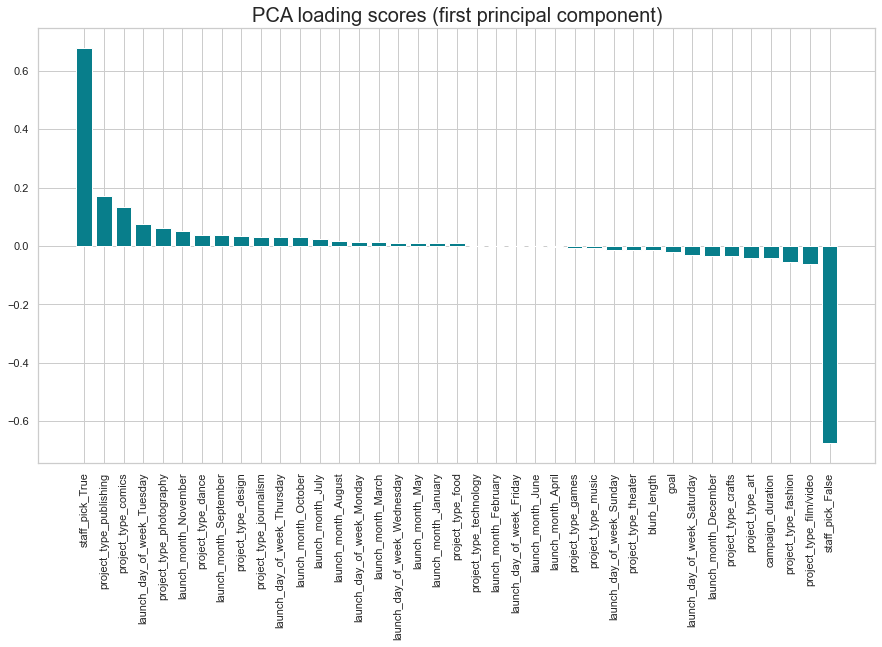

In [348]:
pc1_loadings = loadings_df.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.gcf().set_size_inches(15, 8)
plt.xticks(rotation='vertical')
plt.show()

From the first principal component graph, we see that being the staff pick positively improves the project's chances of success. While not being the staff pick has a massive negative effect on the project's likelihood of success. 

#### Starting of with a logistic regression classifier

Binary logistic regression classifier with default threshold of 0.5. Well suited for the first model to start off our classification problem. 

In [111]:
logreg = LogisticRegression()
logreg.fit(clf_X_scaled_train,y_train)

LogisticRegression()

In [119]:
clf_X_scaled_train.shape

(13378, 39)

In [113]:
y_train.shape

(13378,)

In [98]:
y_hat_train = logreg.predict(clf_X_scaled_train)
y_hat_test = logreg.predict(clf_X_scaled_test)

##### For evaluation,as it is a binary classification problem, we want a balance between recall and precision, as well as high overall accuracy

In [99]:
print("Logistic regression score for training set:", round(logreg.score(clf_X_scaled_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(clf_X_scaled_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

Logistic regression score for training set: 0.7904
Logistic regression score for test set: 0.79142

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      2842
           1       0.74      0.90      0.81      2892

    accuracy                           0.79      5734
   macro avg       0.81      0.79      0.79      5734
weighted avg       0.81      0.79      0.79      5734



In [205]:
logreg_probas = logreg.predict_proba(clf_X_scaled_test)

In [206]:
logreg_probas.shape

(5734, 2)

In [208]:
logreg_fpr,logreg_tpr,thresholds = roc_curve(y_test,logreg_probas[:,0],pos_label=0)

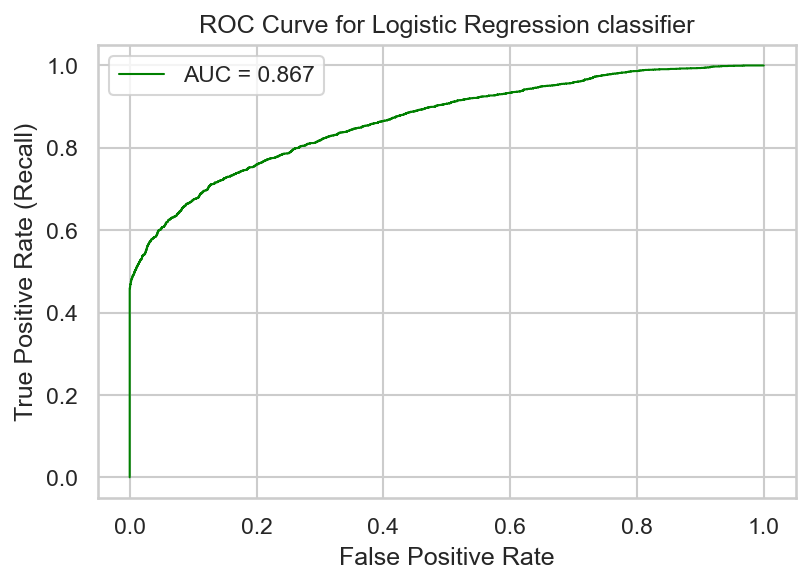

In [224]:
# A look at the ROC curve for logreg classifier
logreg_roc_auc = auc(logreg_fpr, logreg_tpr)
plt.figure(dpi=150)
plt.plot(logreg_fpr, logreg_tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Logistic Regression classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Interestingly, the logistic regression classifier auc shows that we can at 50% true positive rate at 0% false positive rate. It is actually a very decent performing model we have started off with. 

In [100]:
# plotting the confusion matrix
lg_cm = confusion_matrix(y_test,logreg.predict(clf_X_scaled_test))

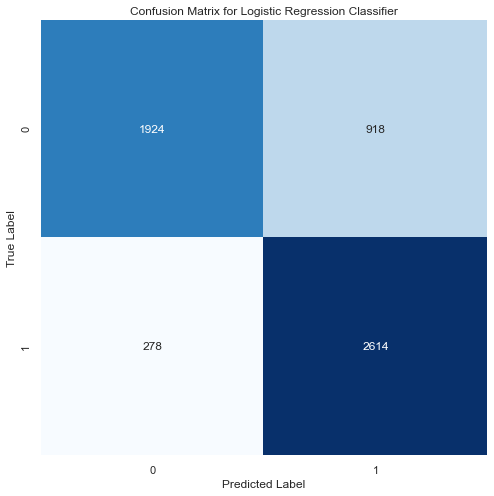

In [101]:
plt.figure(figsize=(8,8))
sns.heatmap(lg_cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=plt.cm.Blues, cbar=False)
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

More false positives than we would like. This is something we should improve upon with alternative models.

In [352]:
# Looking at feature importance according to our logistic regression classifier

In [351]:
feature_importance=pd.DataFrame({'feature':list(clf_X_scaled_train.columns),'feature_importance':[abs(i) for i in logreg.coef_[0]]})
feature_importance.sort_values('feature_importance',ascending=False)

,feature,feature_importance
1,goal,2.573044
9,project_type_film/video,1.421049
37,launch_day_of_week_Tuesday,1.411012
33,launch_day_of_week_Monday,1.299605
38,launch_day_of_week_Wednesday,1.284871
32,launch_day_of_week_Friday,1.268615
36,launch_day_of_week_Thursday,1.240638
19,staff_pick_True,1.170777
30,launch_month_October,1.125967
13,project_type_music,1.124018


In absolute terms, the project goal is the most important feature, while the most important feature from PCA "staff_pick_true" is 8th most important feature

#### Logreg performance summary
##### While logistic regression performs fairly well on both training and testing data, with 0.79 average accuracy. 
##### We can see from our logistic regression classifier that our model is not great at detecting failed projects, recall score for failed is 0.67. While the precision for detecting successful projects is 0.74. Let's see if we can improve this with alternative models

#### Random Forest Classifier with default parameters

Using a random forest classifier next, which is an ensemble model, where it builds decision trees on different samples and takes their majority vote for classification. Also well suited to our supervised binary classification problem. 
Random forest also offer good overview of feature importance which we will also plot later. 

In [146]:
# random forest classifier with default params
rf_clf = RandomForestClassifier(random_state=1)
rf_clf.fit(clf_X_scaled_train,y_train)

RandomForestClassifier(random_state=1)

In [147]:
y_rf_pred = rf_clf.predict(clf_X_scaled_test)

In [150]:
print(classification_report(y_test, rf_clf.predict(clf_X_scaled_test)))
print("Random Forest score for training set:", round(rf_clf.score(clf_X_scaled_train, y_train),5))
print("Random Forest score for test set:", round(rf_clf.score(clf_X_scaled_test, y_test),5))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2866
           1       0.78      0.80      0.79      2868

    accuracy                           0.79      5734
   macro avg       0.79      0.79      0.79      5734
weighted avg       0.79      0.79      0.79      5734

Random Forest score for training set: 0.99963
Random Forest score for test set: 0.78741


Seems to be overfitting on our training set with 0.99 accuracy, run cross validation later
But good recall and accuracy across the board, and an improve from logistic regression in those terms

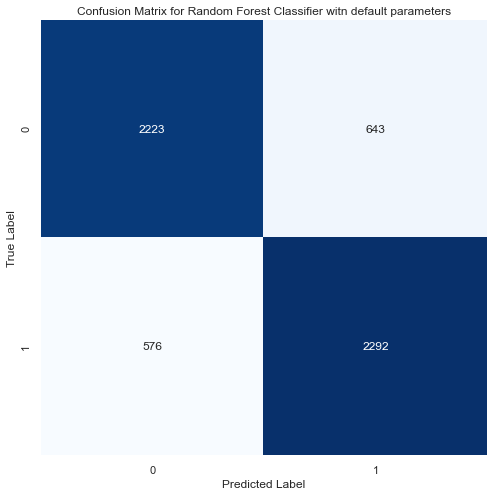

In [162]:
rf_cm = confusion_matrix(y_test,rf_clf.predict(clf_X_scaled_test))
plt.figure(figsize=(8,8))
sns.heatmap(rf_cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=plt.cm.Blues, cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier witn default parameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest Classifier is better at detecting failed projects than logisitic regression
The recall for detecting state "0" is at 0.78 as opposed to the 0.68 from our logitistic regression model

In [212]:
rf_probas = rf_clf.predict_proba(clf_X_scaled_test)

In [223]:
rf_fpr,rf_tpr,thresholds = roc_curve(y_test,rf_probas[:,0],pos_label=0)
rf_roc_auc = auc(rf_fpr, rf_tpr)
rf_roc_auc

0.8708046461130885

In [236]:
# Slightly higher AUC score compared to logistic regression

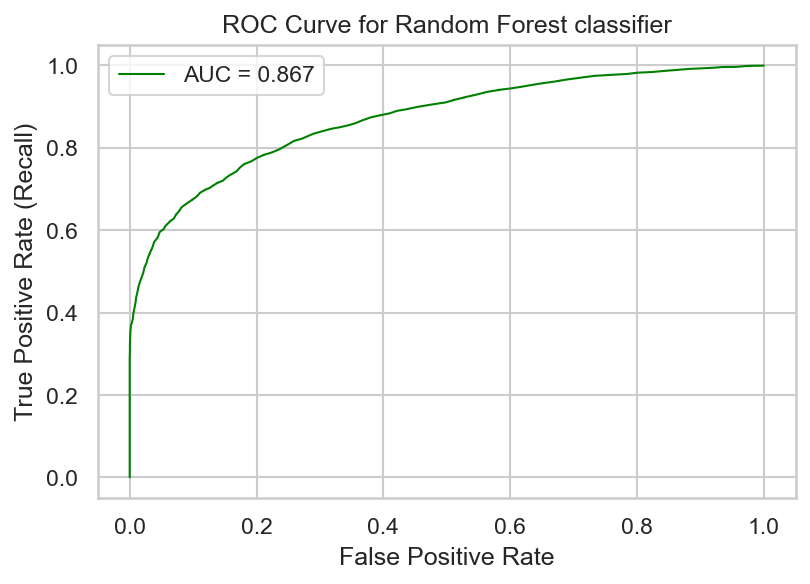

In [375]:
rf_roc_auc = auc(rf_fpr,rf_tpr)
plt.figure(dpi=150)
plt.plot(rf_fpr,rf_tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Random Forest classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

Lower threshold of 0% false positive rate (at just below 0.4) compared to logistic regression classifier

In [129]:
# Lets plot feature importance using random forest classifier

feature_importance = pd.Series(rf_clf.feature_importances_,index=clf_X_scaled.columns).sort_values(ascending=False)
feature_importance


goal                            0.215045
blurb_length                    0.130092
campaign_duration               0.106955
staff_pick_True                 0.055654
staff_pick_False                0.025563
project_type_film/video         0.024044
project_type_theater            0.023070
project_type_comics             0.020822
project_type_music              0.020157
project_type_publishing         0.018250
launch_day_of_week_Tuesday      0.017406
project_type_games              0.017179
project_type_fashion            0.017120
launch_day_of_week_Monday       0.016920
project_type_art                0.016554
launch_day_of_week_Wednesday    0.016358
launch_day_of_week_Friday       0.016163
launch_day_of_week_Thursday     0.016159
launch_month_April              0.013733
launch_month_March              0.013173
launch_month_September          0.013147
launch_month_June               0.013044
launch_month_October            0.012942
launch_month_November           0.012782
launch_month_May

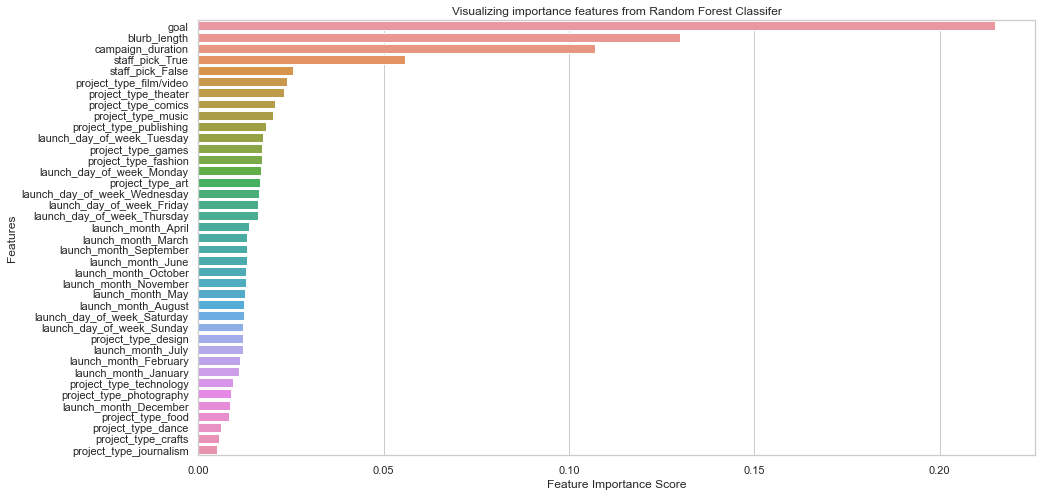

In [163]:
#Plotting feature importance
plt.figure(figsize=(15,8))
sns.barplot(x=feature_importance,y=feature_importance.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing importance features from Random Forest Classifer')
plt.show()


#### Goal, blurb length, campaign_duration, staff_pick are the top features for predicting campaign fundraising success. Some similarity from PCA and logreg feature importance. 

#### Tuning the hyperparamters of the random forest classifier and running cross validation to improve performance and reduce overfitting

In [135]:
# Lets tune our random forest classifier to see if we could get a higher accuracy score

# First look at paramters used in our current forest

print('Parameters currently in use:\n')
pprint(rf_clf.gebt_params())


Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


In [138]:
# hyperparameter tuning using gridsearchcv---SLOW to run

rf_clf = RandomForestClassifier(random_state=1)


param_grid = {
    'n_estimators':[50,75,100,125,150],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap' : [True, False]}

grid_obj = GridSearchCV(
    rf_clf,
    return_train_score=True,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5)

grid_fit = grid_obj.fit(clf_X_scaled_train,y_train)
grbt_opt = grid_fit.best_estimator_

print("="*20)
print("best params:" + str(grid_obj.best_estimator_))
print("best params:" + str(grid_obj.best_params_))
print("best score:",grid_obj.best_score_)
print("="*20)

best params:RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=150, random_state=1)
best params:{'bootstrap': True, 'max_depth': 40, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 150}
best score: 0.7898039478647164


##### Max_depth 40 as opposed to the default max_depth of none, this should prevent the overfitting, as a high max_depth means we are fitting too much detail

In [141]:
# Fitting the best random forest model

best_rf = RandomForestClassifier(bootstrap=True,max_depth=40,max_features='auto',
                                min_samples_leaf=2,min_samples_split=6,
                                n_estimators=150)

best_rf.fit(clf_X_scaled_train,y_train)


rf_y_hat_train = best_rf.predict(clf_X_scaled_train)
rf_y_hat_test = best_rf.predict(clf_X_scaled_test)

print("Random Forest score for training set:", round(best_rf.score(clf_X_scaled_train, y_train),5))
print("Random Forest score for test set:", round(best_rf.score(clf_X_scaled_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, rf_y_hat_test))

Random Forest score for training set: 0.90768
Random Forest score for test set: 0.80206

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2866
           1       0.79      0.83      0.81      2868

    accuracy                           0.80      5734
   macro avg       0.80      0.80      0.80      5734
weighted avg       0.80      0.80      0.80      5734



Overfitting less severe on training set with tuned hyperparams. Higher accuracy on testing set as well. 

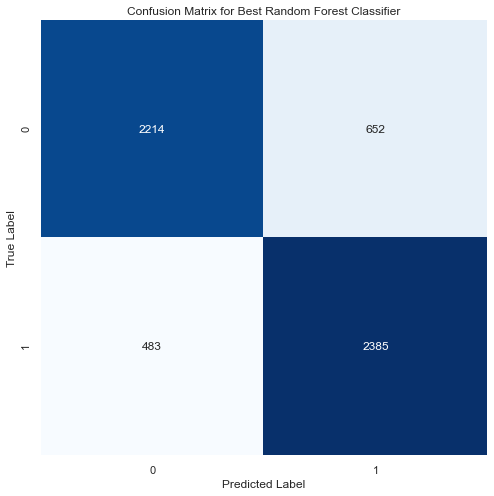

In [161]:
best_rf_cm = confusion_matrix(y_test,best_rf.predict(clf_X_scaled_test))
plt.figure(figsize=(8,8))
sns.heatmap(best_rf_cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=plt.cm.Blues, cbar=False)
plt.title('Confusion Matrix for Best Random Forest Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [217]:
best_rf_probas = best_rf.predict_proba(clf_X_scaled_test)
best_rf_fpr,best_rf_tpr,thresholds = roc_curve(y_test,best_rf_probas[:,0],pos_label=0)

In [225]:
best_rf_roc_auc = auc(best_rf_fpr,best_rf_tpr)
best_rf_roc_auc

0.8777476712011454

#### Using shaply values to further look into feature importance from our best random forest classifier

In [361]:

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(clf_X_scaled_test)


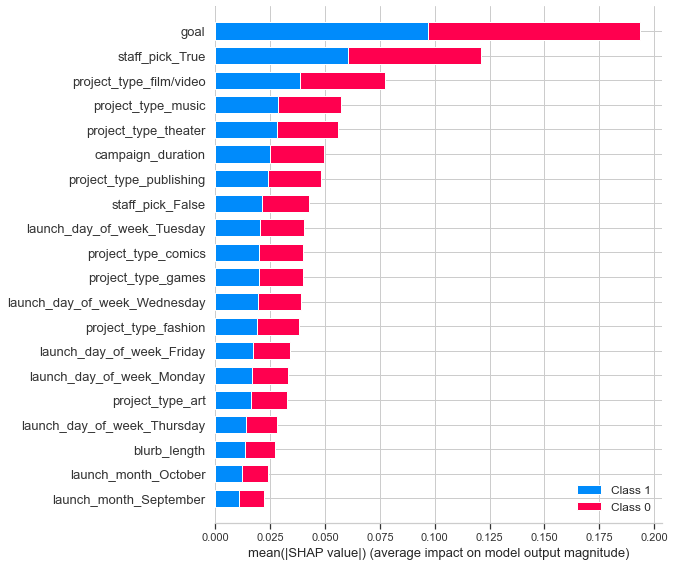

In [362]:
shap.summary_plot(shap_values, clf_X_scaled_test)


Project goal and staff pick remain as important features (for both successful and failed project) which we have seen from previous feature importance plots. While blurb length is not important here and campaign duration is the 6th most important feature. 

In [380]:
# Pulling out one observation to further look into how different features affect final classification

row_to_show = [9]
data_for_prediction = clf_X_scaled_test.iloc[row_to_show]  
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


best_rf.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.21756447, 0.78243553]])

In [326]:
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(data_for_prediction)

In [327]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction)

#### Gradient Boosting Classifier

Moving on to Gradient Boosting Classifier which is also an emsemble model. 
Gradient boosting fits a new predictor to the residual errors made by the previous predictor. 

In [155]:
# Gradient Boosting Classifier with default params

gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(clf_X_scaled_train,y_train)
y_gb_pred = gb_clf.predict(clf_X_scaled_test)

In [157]:
print(classification_report(y_test, gb_clf.predict(clf_X_scaled_test)))
print("Gradient Boosting Classifier score for training set:", round(gb_clf.score(clf_X_scaled_train, y_train),5))
print("Gradient Boosting Classifier score for test set:", round(gb_clf.score(clf_X_scaled_test, y_test),5))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      2866
           1       0.78      0.79      0.79      2868

    accuracy                           0.79      5734
   macro avg       0.79      0.79      0.79      5734
weighted avg       0.79      0.79      0.79      5734

Gradient Boosting Classifier score for training set: 0.79526
Gradient Boosting Classifier score for test set: 0.78671


In [309]:
# Gradient boosting classifier doesn't overfit on the training data, unlike random forest
# And the recall and precision rates are fairly even

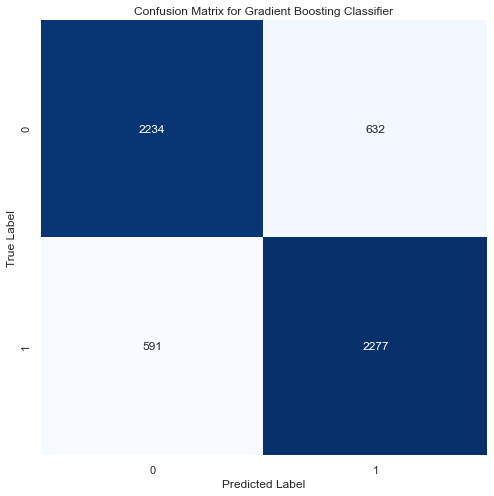

In [160]:
gb_cm = confusion_matrix(y_test,gb_clf.predict(clf_X_scaled_test))
plt.figure(figsize=(8,8))
sns.heatmap(gb_cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=plt.cm.Blues, cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [219]:
gb_probas = gb_clf.predict_proba(clf_X_scaled_test)
gb_rf_fpr,gb_rf_tpr,thresholds = roc_curve(y_test,gb_probas[:,0],pos_label=0)

In [227]:
gb_roc_auc = auc(gb_rf_fpr, gb_rf_tpr)
gb_roc_auc

0.8614006395376564

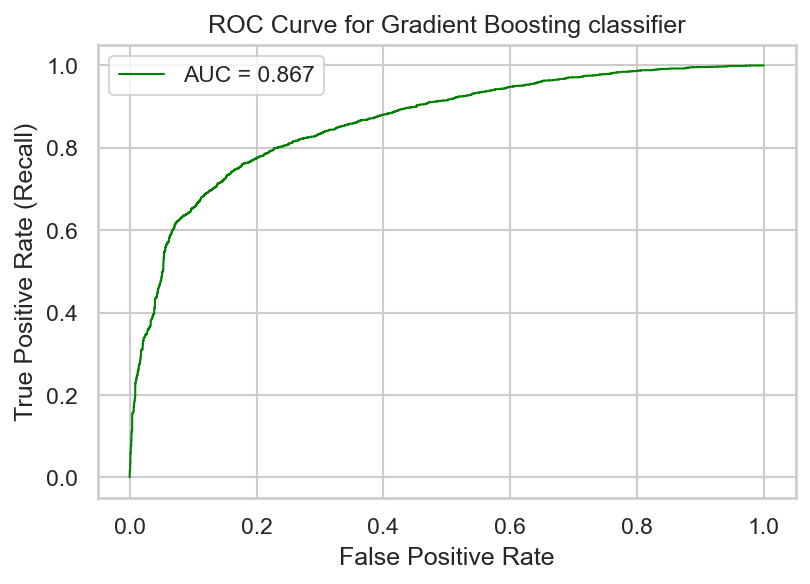

In [378]:
# A look at the ROC curve for gb classifier
logreg_roc_auc = auc(gb_rf_fpr, gb_rf_tpr)
plt.figure(dpi=150)
plt.plot(gb_rf_fpr, gb_rf_tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for Gradient Boosting classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()

While the area under the curve is relatively high, gradient boosting classifier is not fantastic at giving us high recall at low false positive rate, compared to both logreg classifer and random forest. 

In [363]:
explainer = shap.TreeExplainer(gb_clf)
gb_shap_values = explainer.shap_values(clf_X_scaled_test)


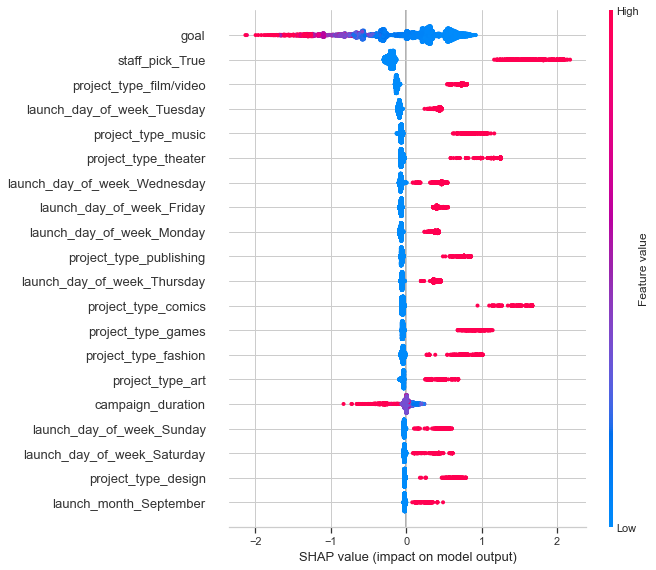

In [364]:
shap.summary_plot(gb_shap_values, clf_X_scaled_test)

Goal and staff pick true here again are the most important features, campaign duration also has a high feature value

#### Trying KNN next

KNN classifies the new data points based on the similarity measure of the earlier stored data points
The key is choosing the right number for K
We will initialise a KNN classifier with k=2, which we will improve upon later

In [249]:
k = 2
knn_clf = KNeighborsClassifier(n_neighbors=k).fit(clf_X_scaled_train,y_train)
y_knn_pred = knn_clf.predict(clf_X_scaled_test)

In [251]:
print(classification_report(y_test, knn_clf.predict(clf_X_scaled_test)))
print("KNN classifer with k=2 accuracy score for training set:", round(knn_clf.score(clf_X_scaled_train, y_train),5))
print("KNN classifer with k=2 accuracy score for test set:", round(knn_clf.score(clf_X_scaled_test, y_test),5))

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      2866
           1       0.74      0.52      0.61      2868

    accuracy                           0.67      5734
   macro avg       0.68      0.67      0.66      5734
weighted avg       0.68      0.67      0.66      5734

KNN classifer with k=2 accuracy score for training set: 0.85379
KNN classifer with k=2 accuracy score for test set: 0.66864


Fairly poor accuracy score  on testing set and poor recall for detecting failed projects

Try to find the optimal K to see if that will improve accuracy score

Minimum error:- 0.24677363097314267 at K = 38


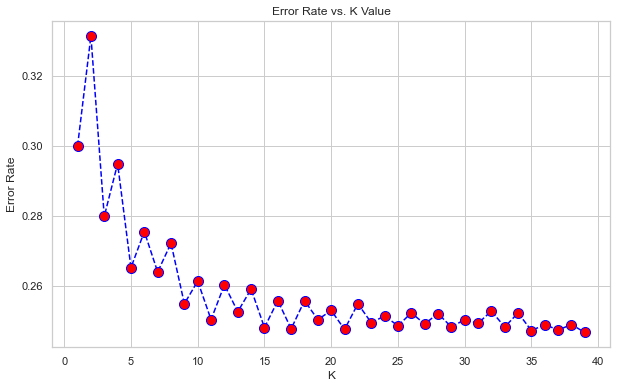

In [252]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(clf_X_scaled_train,y_train)
 pred_i = knn.predict(clf_X_scaled_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7532263690268574 at K = 38


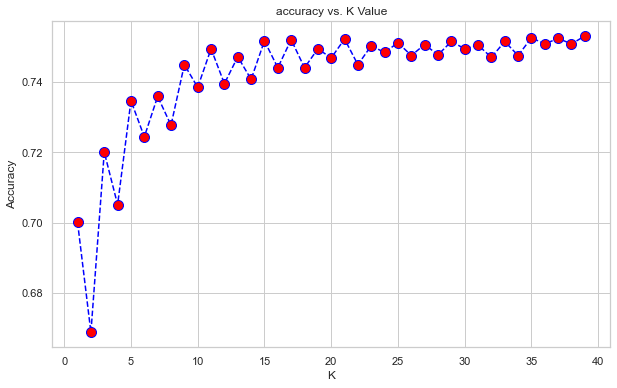

In [253]:
acc = []
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(clf_X_scaled_train,y_train)
    yhat = neigh.predict(clf_X_scaled_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [254]:
optimal_k = 38
best_knn_clf = KNeighborsClassifier(n_neighbors=optimal_k).fit(clf_X_scaled_train,y_train)
y_best_knn_pred = knn_clf.predict(clf_X_scaled_test)

In [261]:
print(classification_report(y_test, best_knn_clf.predict(clf_X_scaled_test)))
print("KNN classifer with k=38 accuracy score for training set:", round(best_knn_clf.score(clf_X_scaled_train, y_train),5))
print("KNN classifer with k=38 accuracy score for test set:", round(best_knn_clf.score(clf_X_scaled_test, y_test),5))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      2866
           1       0.74      0.77      0.75      2868

    accuracy                           0.75      5734
   macro avg       0.75      0.75      0.75      5734
weighted avg       0.75      0.75      0.75      5734

KNN classifer with k=38 accuracy score for training set: 0.76499
KNN classifer with k=38 accuracy score for test set: 0.75096


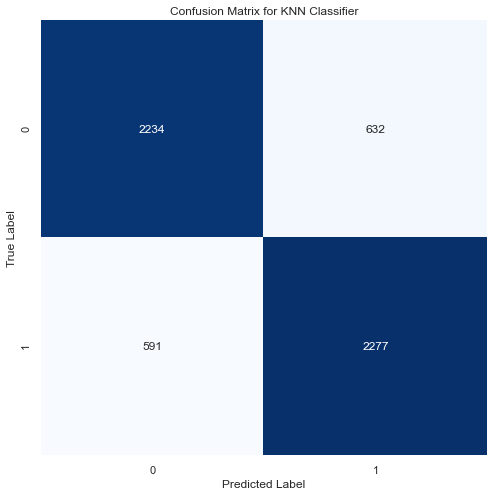

In [264]:
knn_cm = confusion_matrix(y_test,knn_clf.predict(clf_X_scaled_test))
plt.figure(figsize=(8,8))
sns.heatmap(gb_cm, annot=True, fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'], cmap=plt.cm.Blues, cbar=False)
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

KNN classifier does not offer the highest level of accuracy compared to our other models

In [257]:
knn_probas = best_knn_clf.predict_proba(clf_X_scaled_test)
knn_rf_fpr,knn_rf_tpr,thresholds = roc_curve(y_test,gb_probas[:,0],pos_label=0)
knn_roc_auc = auc(gb_rf_fpr, gb_rf_tpr)
knn_roc_auc

0.8614006395376564

### Compare auc-roc curves for our models

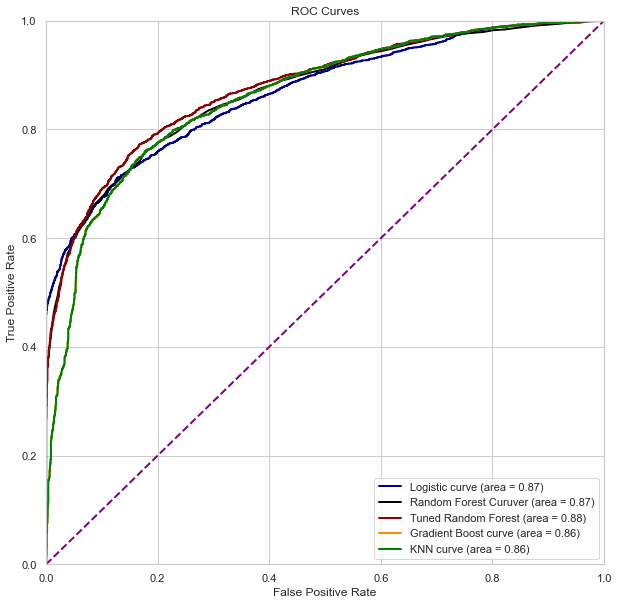

In [263]:
plt.figure(figsize=(10,10))
lw = 2
plt.plot(logreg_fpr, logreg_tpr, color='darkblue',
         lw=lw, label='Logistic curve (area = %0.2f)' % logreg_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='black',
         lw=lw, label='Random Forest Curuver (area = %0.2f)' % rf_roc_auc)
plt.plot(best_rf_fpr, best_rf_tpr, color='darkred',
         lw=lw, label='Tuned Random Forest (area = %0.2f)' % best_rf_roc_auc)
plt.plot(gb_rf_fpr,gb_rf_tpr, color='darkorange',
         lw=lw, label='Gradient Boost curve (area = %0.2f)' % gb_roc_auc)
plt.plot(gb_rf_fpr,gb_rf_tpr, color='green',
         lw=lw, label='KNN curve (area = %0.2f)' % knn_roc_auc)

plt.plot([0, 1], [0, 1], color='purple', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

##### The auc-roc curves:

There is not a huge difference between the roc curves of different models. 
The tuned random forest curve area is 0.88 where is the largest, but only by a small amount. 


### Choosing the best model: 

#### Out of the classification models we trained, the random forest classifier with tuned hyperparameters overall. 
1. It offers good recall and precision performance
2. It has the highest accuracy on testing set
3. The best auc_roc curve, good balance between sensitivity and specificity.

#### Most important features from our ML modelling:

Goal and staff_pick_true are two features which occured as most important in our various different classifiers and PCA. While blurb length and campaign duration were also identified as important features by some classifiers. 

#### Recommendations:

From our EDA and machine learning modelling, we can conclude and recommend the following for creators of kickstarter projects. 

1. It is important to have your project selected as the staff pick, which will improve the chances of the project succeeding. 
2. Setting a modest goal for your project improve the chance of success. As projects with lower goals are more likely to be successful in their fundraising campaign. 
3. Campaign duration has some affect on likehlihood of success. As we see that successful projects tend to have shorter campaign duration. 30 is the median for successful campaigns. 
4. It is worth considering whether your project is best suited for fundraising via Kickstarter. I.e. While film projects are popular on Kickstarter in terms of numbers, they don't tend to have higher likelihood of success, perhaps due to too much competition. While Tech and Games projects are performing very well on Kickstarter over the past few years. 


#### Further work:

1. Would be interesting to look further into the images and languages used by the campaigns and whether they have an affect on the project's likelihood of success. 
2. In this project, I am only looking at projects from the UK. But it would also be interesting to compared different types of projects across different countries/regions. And whether different factors influence their likelihood of success. 